# introduction:

###  The data that I chose are hospital appointments. I used the skills that I acquired
### through the educational material to answer some of the questions that I put together like:

#### cheak what Neighbourhood has more petient who drink alchool and not showup ?
#### check  if patient receive a massege will affict there show up to the appoinment or not?
#### check percentage of showing up or not for female who have Diabetes
### and used some visualization  to clearly represent the data such as bar chart and Histogram and pie chart.


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

#### importing dataset from my computer

In [41]:
data=pd.read_csv('/Users/azizaziz/Desktop/KaggleV2-May-2016.csv')

#### rename no show column 

In [42]:
data.rename(columns={'No-show':'noshow'},inplace=True)

In [43]:
data.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,noshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


#### drop the column that i do not need it in my analytics 

In [44]:
data.drop(columns='AppointmentID',inplace=True)

In [45]:
data.nunique()

PatientId          62299
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
noshow                 2
dtype: int64

In [46]:
data[data.Age <0]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,noshow
99832,4.659432e+14,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


#### drop the rows that not able to use 

In [47]:
mask=data['Age']>=0

In [48]:
data=data[mask]

In [49]:
data.shape

(110526, 13)

#### creat new column for age  range to make age more clear and  easy to use 

In [50]:
data['rangeAge']=pd.cut(data.Age,[0,15,30,45,60,75,90,105,120])

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null float64
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null object
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
noshow            110526 non-null object
rangeAge          106987 non-null category
dtypes: category(1), float64(1), int64(7), object(5)
memory usage: 11.9+ MB


### summary statistics of dataset

In [52]:
data.describe()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### custom function to avoid repetitive code

In [53]:
def countPlot(data,hue2=None):
    return sns.countplot(x=data, hue=hue2)

### we will check  if patient receive a massege will affict there show up to the appoinment or not 

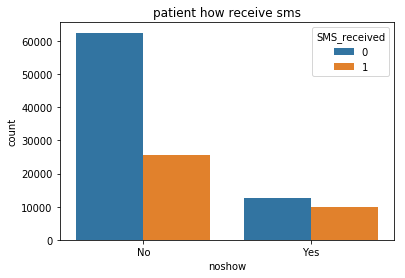

In [54]:
plt.title('patient how receive sms')
countPlot(data['noshow'],data['SMS_received'])   

### as we see most of patient who did not showup get a massege that is mean the massege not help 


### check the distribution of age based on showing up or not 

In [55]:
noShow=data.query('noshow=="No"')
show=data.query('noshow=="Yes"')

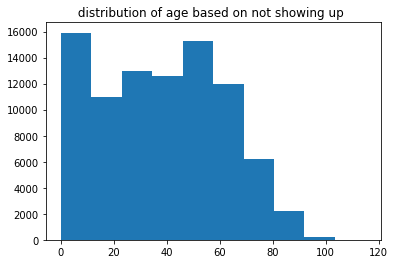

In [56]:
plt.title(' distribution of age based on not showing up  ')
plt.hist(noShow.Age);

### as we see in the distrubtion most of piteint how did not show up there age between 0-10 and 50-60

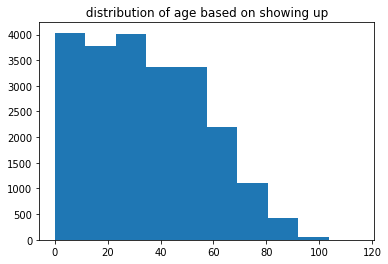

In [57]:
plt.title(' distribution of age based on showing up ')

plt.hist(show.Age);

### as we see in the distrubtion most of piteint how showing up there age between 0-35 

### we will cheak what Neighbourhood has more petient who drink alchool and not showup 

In [58]:
alchoolPep=data.query('Alcoholism==1 & noshow=="Yes"')

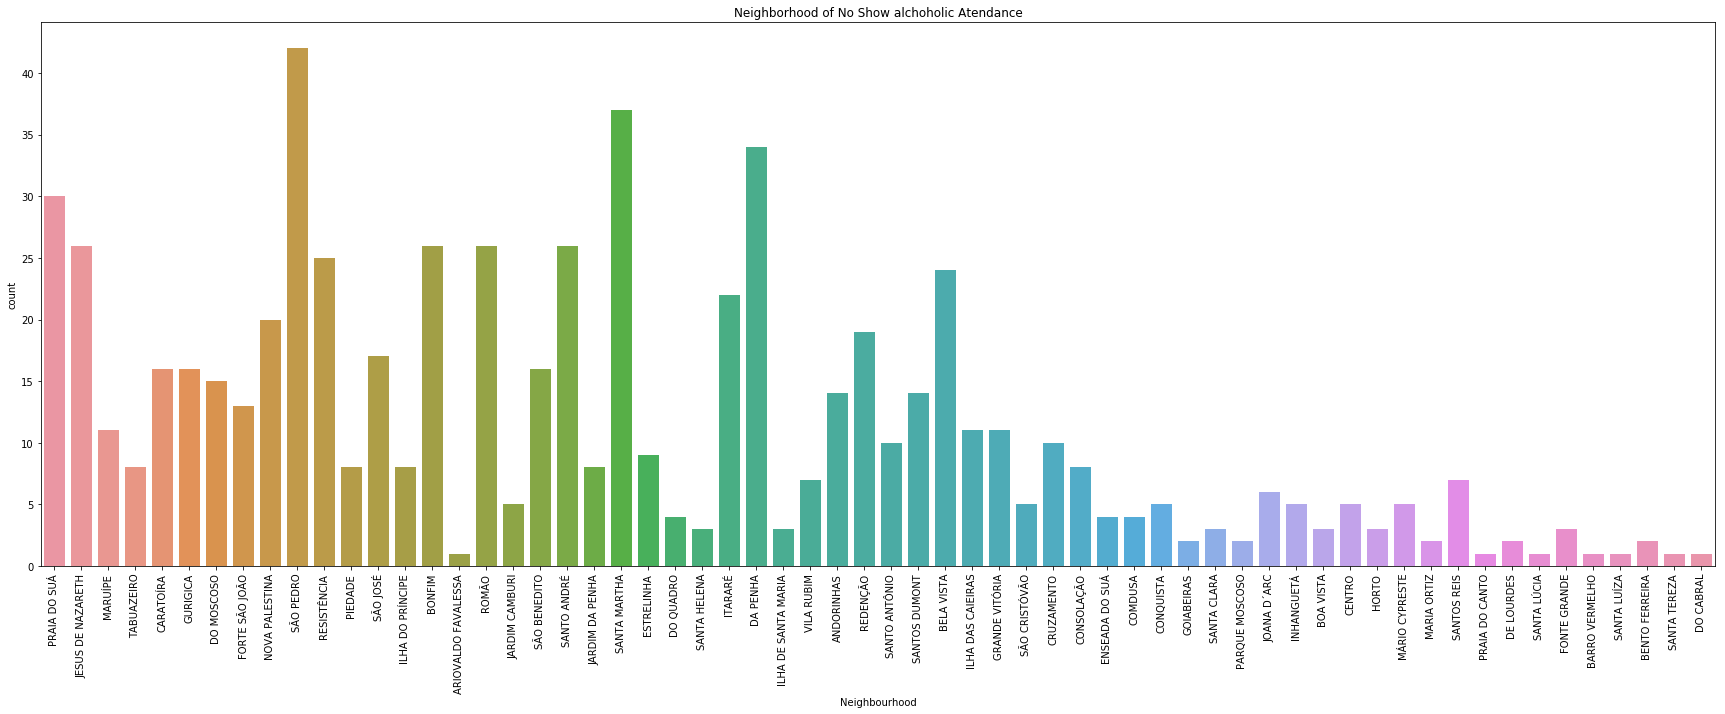

In [59]:
plt.figure(figsize=(30,10));
countPlot(alchoolPep['Neighbourhood'])
plt.title('Neighborhood of No Show alchoholic Atendance');
plt.xticks(rotation=90);


### as we see the most neighborhood wihch has alchooliec petient who did not show up is "SAO PEDRO"

In [60]:
noShow.count()

PatientId         88207
Gender            88207
ScheduledDay      88207
AppointmentDay    88207
Age               88207
Neighbourhood     88207
Scholarship       88207
Hipertension      88207
Diabetes          88207
Alcoholism        88207
Handcap           88207
SMS_received      88207
noshow            88207
rangeAge          85307
dtype: int64

### we will check percentage of showing up or not for female who have Diabetes

In [61]:
DiabetesF=data.query('Gender=="F" & Diabetes==1 ')

In [62]:
DiabetesFGroupS=DiabetesF.groupby('noshow').count()['PatientId']

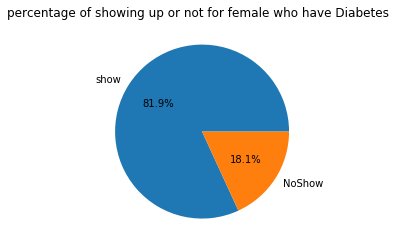

In [63]:
plt.title('percentage of showing up or not for female who have Diabetes  ')
plt.pie(DiabetesFGroupS,labels=( 'show','NoShow'),autopct ='%1.1f%%');

### as we see in the pie chart most of female who have a diabetes showing up in there appointment 
### -------------------------------------------------------------------------

### In conclusion, the data was almost clean and clear. I had a problem asking the question and finding
### clear answers from the data, but I try to improve it and I will work on developing this skill
### in the future! I used data visualization tools like bar chart, chart pie, and also Histogram to help me
### communicate the results that I found.